<a href="https://colab.research.google.com/github/nishah8/dataandpython/blob/main/Copy_of_Correlation_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces two new libraries:

**matplotlib**

A library of functions for plotting static, animated and interactive visualisations of data sets.  For ease, pandas use matplotlib for plotting a range of charts.

**scipy**

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`)

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up

In [3]:

import pandas as pd
from scipy.stats import linregress

county_level_df = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true',sheet_name="county-level")
x = county_level_df['Age']
y = county_level_df['Income']
regression = ( linregress(x,y) )
print(regression)
print(regression.slope)
print(regression.intercept)
print(regression.rvalue)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189, intercept_stderr=16.08233482195521)
-0.31433084434233205
72.78388856978748
-0.14787411576068246


### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [11]:
import pandas as pd
from scipy.stats import linregress

county_level_df = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true',sheet_name="county-level")
x = county_level_df['Population']
y = county_level_df['Income']

regression = ( linregress(x,y) )
p_val = regression.pvalue
print(f"R-squared: {regression.rvalue**2}")
print("p_value:", p_val)

if p_val <0.05:
  print('relationship between population and income is significant')
else:
  print('no significant correlation between population and income')


#plt.plot(x, y, 'o', label='original data')
#plt.plot(x, regression.intercept + regression.slope*x, 'r', label='fitted line')
#plt.legend()
#plt.show()






R-squared: 0.013558605755058871
p_value: 0.6454275157910035
no significant correlation between population and income


 R2 measures the proportion of variability in the target that can be explained using the variable. Therefore, assuming a linear relationship, if the chosen variable can explain/predict the target, then the proportion is high and the R2 value will be close to 1. If the opposite is true, the R2 value is then closer to 0. In our case R2 is closer to 0 meaning its realtionship is not correlated in any significant way.

 that is also corraborated with the fact p_value is also not statistically significant.

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [17]:
import pandas as pd
from scipy.stats import linregress

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

x = df['Stress']
y = df['Wellbeing']

regression = ( linregress(x,y) )
print(regression)
print()
p_val = regression.pvalue
print(f"R-squared: {regression.rvalue**2}")
print()
if p_val <0.05:
  print('relationship between Stress and Wellbeing is significant')
else:
  print('no significant correlation between Stress and Wellbeing')

print('the pvalue is:',p_val)


LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022, intercept_stderr=2.4636244230057622)

R-squared: 0.4507725540176983

relationship between Stress and Wellbeing is significant
the pvalue is: 6.084540561441803e-07


# Visualising the data
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use matplotlib, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 4 to 10 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

### Exercise 4 - Line plot of net migration
---

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings)
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

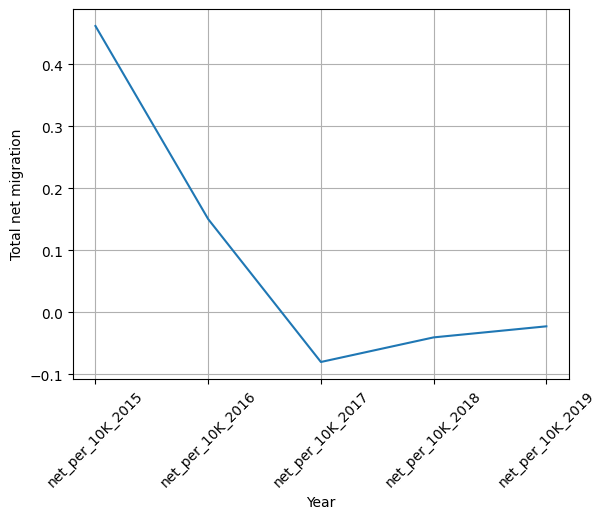

In [24]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

countrymig_df = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true',sheet_name="Country Migration")
#countrymig_df.info()

cm_df = countrymig_df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
#cm_df.info()

mig_mean = cm_df.mean()
#print(mig_mean)
labels = ['net mig per 10K 2015','net mig per 10K 2016','net mig per 10K 2017','net mig per 10K 2018','net mig per 10K 2019']

plt.plot(mig_mean)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total net migration')
plt.grid()
plt.show()


### Exercise 5 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  

* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
* display your bar graph with plt.show

net_per_10K_2015    150.68
net_per_10K_2016    124.48
net_per_10K_2017     87.00
net_per_10K_2018     91.41
net_per_10K_2019     87.71
dtype: float64


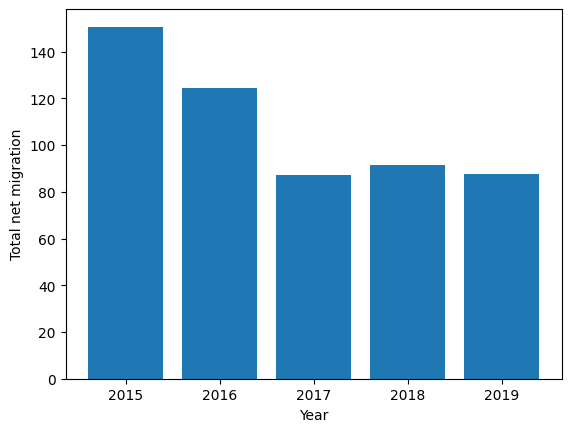

In [42]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

countrymig_df = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true',sheet_name="Country Migration")
#countrymig_df.info()

cm_df = countrymig_df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
#cm_df.info()

mig_max = cm_df.max()
print(mig_max)
labels =['2015','2016','2017','2018','2019']

plt.bar(labels,mig_max)
plt.xlabel('Year')
plt.ylabel('Total net migration')
plt.show()



### Exercise 6 - creating a bar graph using grouped data
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`'
* extract your labels (x) using the .keys() function
* use the plt.barh(x, y) to create a horizontal bar graph
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

target_country_wb_income
High Income           -0.467458
Low Income             0.072162
Lower Middle Income    0.940092
Upper Middle Income    0.455128
Name: net_per_10K_2019, dtype: float64


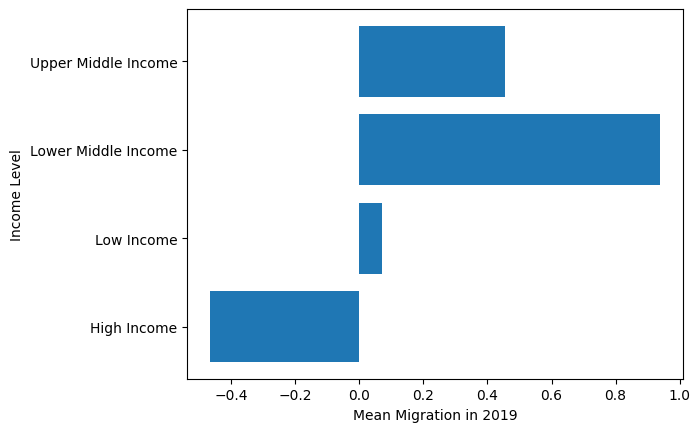

In [47]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

countrymig_df = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true',sheet_name="Country Migration")
#countrymig_df.info()

tcwi = countrymig_df.groupby('target_country_wb_income')['net_per_10K_2019'].mean()
print (tcwi)
labels = tcwi.keys()


plt.barh(labels,tcwi)
plt.xlabel('Mean Migration in 2019')
plt.ylabel('Income Level')
plt.show()


# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 7 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 6 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




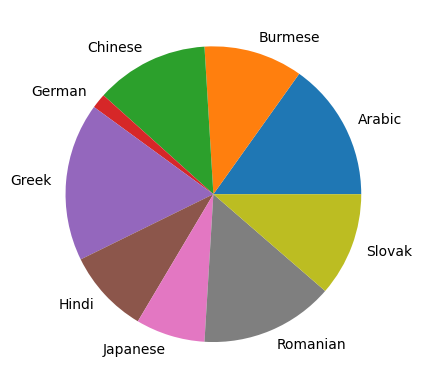

In [51]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)
#psych_data.info()

firstlang_stress = psych_data.groupby('firstlanguage')['Stress'].mean()
labels = firstlang_stress.keys()

plt.pie(firstlang_stress, labels = labels)
plt.show()



### Exercise 8 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median.

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot
*  show the boxplot

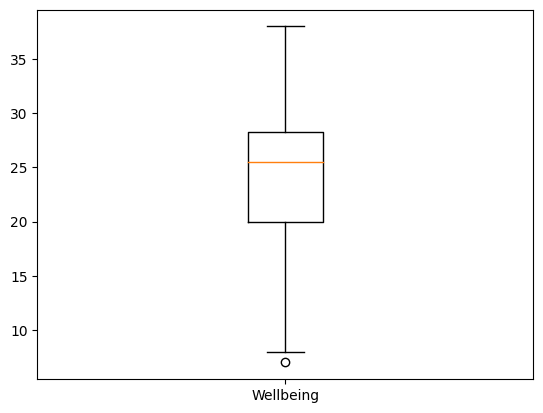

In [61]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)
#psych_data.info()
data = psych_data['Wellbeing']
plt.boxplot(data)
plt.xticks([1],['Wellbeing'])
plt.show()

### Exercise 9 - Histograms of  age
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)`
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


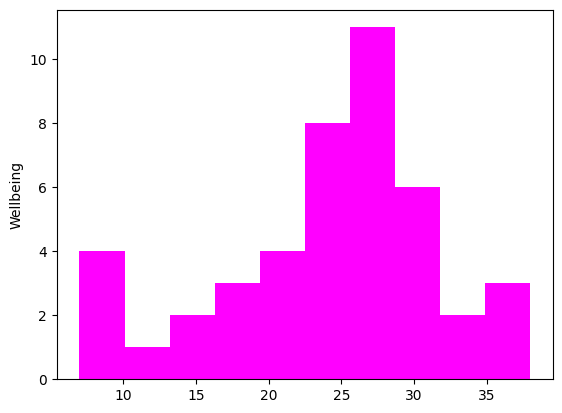

In [65]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)
#psych_data.info()
data = psych_data['Wellbeing']
plt.hist(data,color='magenta')
plt.ylabel('Wellbeing')
plt.show()



### Exercise 10 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Earlier in exercise 3, we found that Stress significantly predicted Wellbeing.

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept)

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




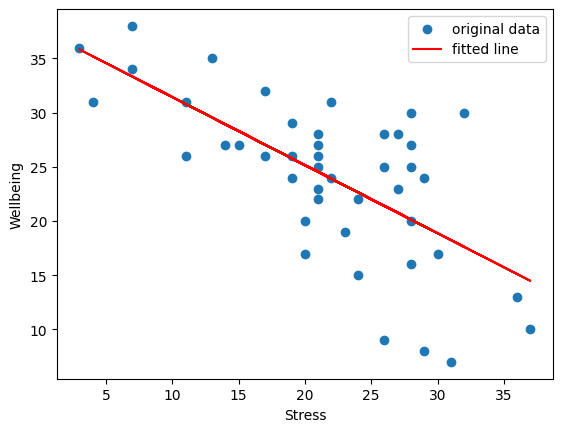

In [69]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)
#psych_data.info()
x = psych_data['Stress']
y = psych_data['Wellbeing']
regression = ( linregress(x,y))
slope = regression.slope
intercept = regression.intercept

plt.scatter(x,y,label='original data')
plt.xlabel('Stress')
plt.ylabel('Wellbeing')
plt.plot(x, slope*x + intercept,'r', label='fitted line')
plt.legend()
plt.show()


## Data story
---
on observing the produced plot, we can say with a degree of certainity that stress and wellbeing are significantly correlated. the trend is clear if stress is lower, wellbeing is better!

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)